In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import dates
sns.set_style("darkgrid")

In [2]:
from classes import *

In [6]:
today = datetime.strptime("2019-08-20", "%Y-%m-%d")
df = ExcelReader.read(today, 'Portfolio.xlsx')

In [9]:
c = YTMCalculator()
disc = Discount('COMPOUND')

selected = df.Bond.unique().tolist()
# selected = ['CERO_3M', 'CERO_6M', 'CERO_12M', 'TEST']
# selected = ['CERO_12M', 'TEST']

instruments = sorted([BondGenerator.bond_from_dataframe(df[df.Bond==name]) for name in selected], key=lambda x: x.maturity_date)
yields_to_maturity = [c.get_ytm(instr, disc) for instr in instruments]
maturities = [instr.maturity_date for instr in instruments]

# YTMs calculadas a partir de 'Price Date', que se genero a partir del valor de la variable 'today'
periods = [(m-today).days/365. for m in maturities]

print([instr.name for instr in instruments])
print(periods)
print(yields_to_maturity)

['CERO_6M', 'AO20', 'A2E2', 'CO26', 'A2E7']
[1.0027397260273974, 1.1369863013698631, 2.4383561643835616, 7.191780821917808, 7.441095890410959]
[0.24923812998001282, 0.4993514269027107, 0.3653629258062832, 0.08182800955271757, 0.1996627206966341]


In [10]:
curve = Curve()
spot_curve = curve.get_spot_curve(today, instruments, disc)
print(spot_curve)

[0.24847880402773528, 0.11135212223745532, 1.2803221528170028, 0.24242425646918098, 0.021073338242093086]


In [11]:
data = pd.DataFrame({'maturity': periods, 'ytm': yields_to_maturity, 'spot': spot_curve})

Text(0.5, 1.0, 'SPOT vs. YTM')

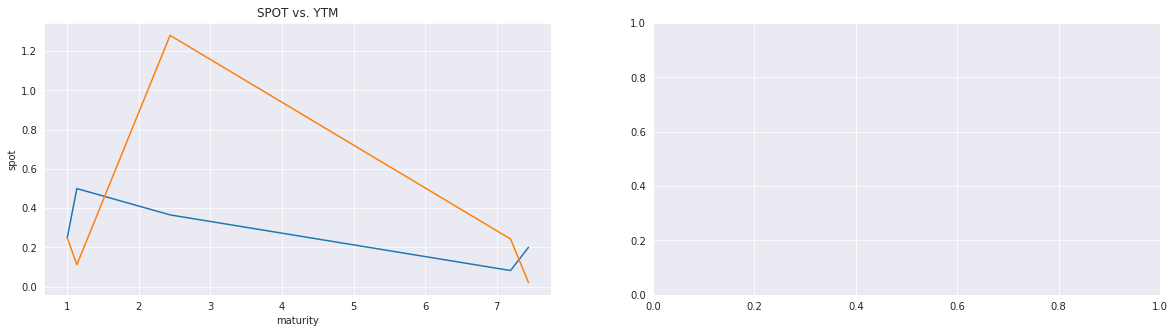

In [12]:
fig, ax = plt.subplots(figsize=(20,5), ncols=2, nrows=1)

# SPOT 2 VS YTM
sns.lineplot(data=data, x='maturity', y='ytm', ax=ax[0], markers=["o"])
sns.lineplot(data=data, x='maturity', y='spot', ax=ax[0], markers=["x"])
ax[0].set_title('SPOT vs. YTM')

# # FORWARD vs. YTM
# sns.lineplot(data=z_forward, x='maturity', y='yield', ax=ax[1], markers=["o"], style="Curves")
# sns.lineplot(data=z, x='maturity', y='yield', ax=ax[1], markers=["x"], style="Curves")
# ax[1].set_title('FORWARD vs. YTM')